<a href="https://colab.research.google.com/github/Abhinav-1708/IIITH-FMML/blob/main/FMML_M1L2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


How is the accuracy of the validation set affected if we increase the percentage of validation set? What happens when we reduce it?
How does the size of the train and validation set affect how well we can predict the accuracy on the test set using the validation set?
What do you think is a good percentage to reserve for the validation set so that thest two factors are balanced?

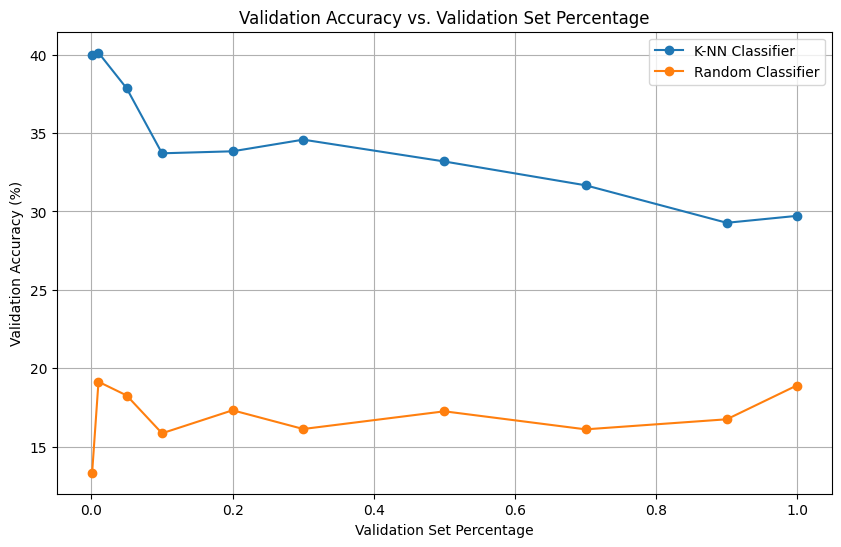

In [1]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

# Set random seed for reproducibility
rng = np.random.default_rng(seed=42)

# Load California Housing dataset
dataset = datasets.fetch_california_housing()
dataset.target = dataset.target.astype(int)  # Convert target to integer for classification

# Define classifiers and accuracy metric
def NN1(traindata, trainlabel, query):
    diff = traindata - query
    sq = diff * diff
    dist = sq.sum(1)
    label = trainlabel[np.argmin(dist)]
    return label

def NN(traindata, trainlabel, testdata):
    predlabel = np.array([NN1(traindata, trainlabel, i) for i in testdata])
    return predlabel

def RandomClassifier(traindata, trainlabel, testdata):
    classes = np.unique(trainlabel)
    rints = rng.integers(low=0, high=len(classes), size=len(testdata))
    predlabel = classes[rints]
    return predlabel

def Accuracy(gtlabel, predlabel):
    assert len(gtlabel) == len(predlabel), "Length mismatch"
    correct = (gtlabel == predlabel).sum()
    return correct / len(gtlabel)

def split(data, label, percent):
    rnd = rng.random(len(label))
    split1 = rnd < percent
    split2 = rnd >= percent

    split1data = data[split1, :]
    split1label = label[split1]
    split2data = data[split2, :]
    split2label = label[split2]
    return split1data, split1label, split2data, split2label

# Split dataset into training and testing sets (20% test set)
testdata, testlabel, alltraindata, alltrainlabel = split(dataset.data, dataset.target, 0.20)

# Experiment with different validation set sizes
validation_percentages = [0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.5, 0.7, 0.9, 0.999]
nn_accuracies = []
random_accuracies = []

for val_percent in validation_percentages:
    traindata, trainlabel, valdata, vallabel = split(alltraindata, alltrainlabel, 1 - val_percent)

    # Nearest Neighbor validation accuracy
    valpred_nn = NN(traindata, trainlabel, valdata)
    nn_accuracy = Accuracy(vallabel, valpred_nn)
    nn_accuracies.append(nn_accuracy * 100)

    # Random Classifier validation accuracy
    valpred_random = RandomClassifier(traindata, trainlabel, valdata)
    random_accuracy = Accuracy(vallabel, valpred_random)
    random_accuracies.append(random_accuracy * 100)

# Plot the accuracies
plt.figure(figsize=(10, 6))
plt.plot(validation_percentages, nn_accuracies, label='K-NN Classifier', marker='o')
plt.plot(validation_percentages, random_accuracies, label='Random Classifier', marker='o')
plt.xlabel('Validation Set Percentage')
plt.ylabel('Validation Accuracy (%)')
plt.title('Validation Accuracy vs. Validation Set Percentage')
plt.legend()
plt.grid(True)
plt.show()


Try to implement a 3 nearest neighbour classifier and compare the accuracy of the 1 nearest neighbour classifier and the 3 nearest neighbour classifier on the test dataset. You can use the KNeighborsClassifier class from the scikit-learn library to implement the K-Nearest Neighbors model. You can set the number of neighbors using the n_neighbors parameter. You can also use the accuracy_score function from the scikit-learn library to calculate the accuracy of the model.



Test accuracy for 1-NN: 34.92%
Test accuracy for 3-NN: 36.05%


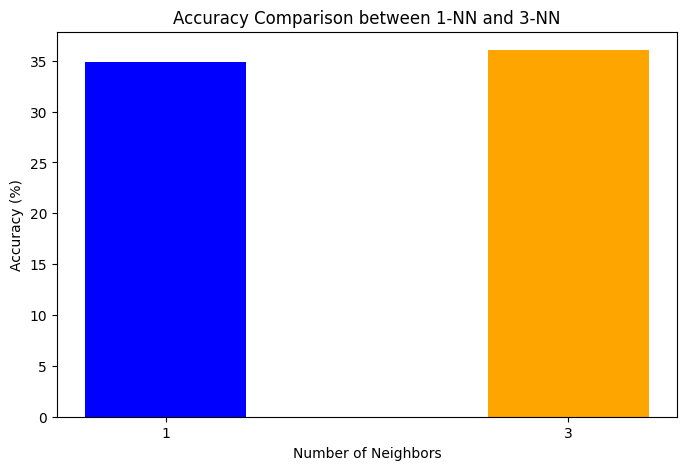

In [2]:
import numpy as np
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Set random seed for reproducibility
rng = np.random.default_rng(seed=42)

# Load California Housing dataset
dataset = datasets.fetch_california_housing()
dataset.target = dataset.target.astype(int)  # Convert target to integer for classification

# Define split function (reuse from your previous code)
def split(data, label, percent):
    rnd = rng.random(len(label))
    split1 = rnd < percent
    split2 = rnd >= percent

    split1data = data[split1, :]
    split1label = label[split1]
    split2data = data[split2, :]
    split2label = label[split2]
    return split1data, split1label, split2data, split2label

# Split dataset into training (80%) and testing (20%) sets
testdata, testlabel, traindata, trainlabel = split(dataset.data, dataset.target, 0.20)

# Initialize 1-NN and 3-NN classifiers
knn_1 = KNeighborsClassifier(n_neighbors=1)
knn_3 = KNeighborsClassifier(n_neighbors=3)

# Train the classifiers
knn_1.fit(traindata, trainlabel)
knn_3.fit(traindata, trainlabel)

# Predict on the test set
testpred_1 = knn_1.predict(testdata)
testpred_3 = knn_3.predict(testdata)

# Calculate accuracy
accuracy_1 = accuracy_score(testlabel, testpred_1)
accuracy_3 = accuracy_score(testlabel, testpred_3)

# Print the accuracies
print(f"Test accuracy for 1-NN: {accuracy_1 * 100:.2f}%")
print(f"Test accuracy for 3-NN: {accuracy_3 * 100:.2f}%")

# Plotting results for visualization
neighbors = [1, 3]
accuracies = [accuracy_1 * 100, accuracy_3 * 100]

plt.figure(figsize=(8, 5))
plt.bar(neighbors, accuracies, color=['blue', 'orange'])
plt.xticks(neighbors)
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy Comparison between 1-NN and 3-NN')
plt.show()


Exercise: How does the accuracy of the 3 nearest neighbour classifier change with the number of splits? How is it affected by the split size? Compare the results with the 1 nearest neighbour classifier.

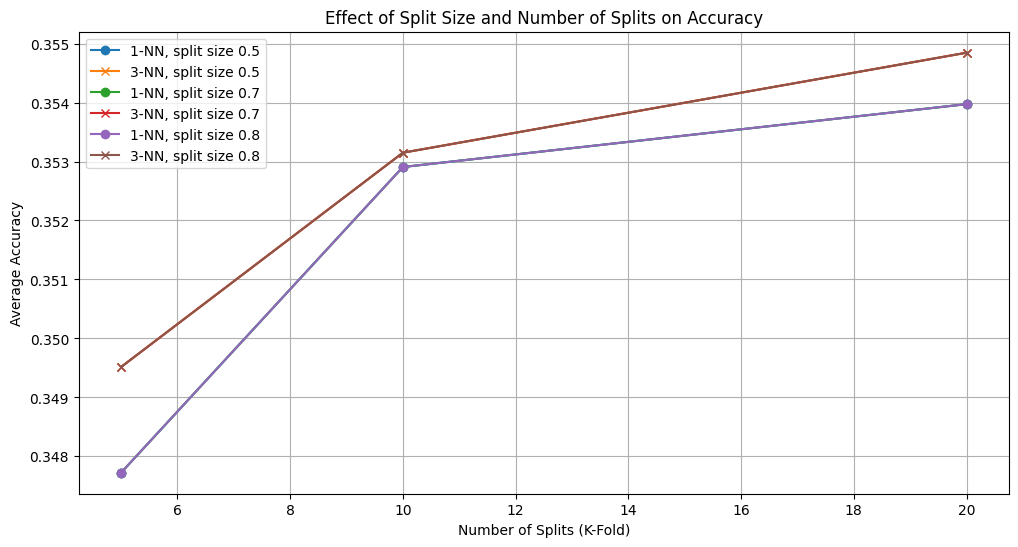

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import accuracy_score

# Load the dataset
dataset = fetch_california_housing()
X, y = dataset.data, dataset.target.astype(int)

# Different split sizes to test
split_sizes = [0.5, 0.7, 0.8]

# Number of splits to test for cross-validation
num_splits = [5, 10, 20]

# To store results for plotting
results_1nn = []
results_3nn = []

# Loop through each split size
for split_size in split_sizes:
    accuracies_1nn = []
    accuracies_3nn = []

    # Loop through each number of splits
    for splits in num_splits:
        kf = KFold(n_splits=splits, shuffle=True, random_state=42)
        split_accuracies_1nn = []
        split_accuracies_3nn = []

        # Perform K-Fold Cross-Validation
        for train_index, val_index in kf.split(X):
            X_train, X_val = X[train_index], X[val_index]
            y_train, y_val = y[train_index], y[val_index]

            # Train 1-NN
            knn1 = KNeighborsClassifier(n_neighbors=1)
            knn1.fit(X_train, y_train)
            y_pred_1nn = knn1.predict(X_val)
            split_accuracies_1nn.append(accuracy_score(y_val, y_pred_1nn))

            # Train 3-NN
            knn3 = KNeighborsClassifier(n_neighbors=3)
            knn3.fit(X_train, y_train)
            y_pred_3nn = knn3.predict(X_val)
            split_accuracies_3nn.append(accuracy_score(y_val, y_pred_3nn))

        # Calculate average accuracy for this number of splits
        accuracies_1nn.append(np.mean(split_accuracies_1nn))
        accuracies_3nn.append(np.mean(split_accuracies_3nn))

    results_1nn.append(accuracies_1nn)
    results_3nn.append(accuracies_3nn)

# Plot the results
plt.figure(figsize=(12, 6))
for idx, split_size in enumerate(split_sizes):
    plt.plot(num_splits, results_1nn[idx], label=f'1-NN, split size {split_size}', marker='o')
    plt.plot(num_splits, results_3nn[idx], label=f'3-NN, split size {split_size}', marker='x')

plt.xlabel('Number of Splits (K-Fold)')
plt.ylabel('Average Accuracy')
plt.title('Effect of Split Size and Number of Splits on Accuracy')
plt.legend()
plt.grid(True)
plt.show()
